# Assignment 2: Linear Models and Validation Metrics (40 marks total)
### Due: February 16 at 11:59pm

### Name: Saurav Uprety

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (20 marks)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [60]:
# TO DO: Import spam dataset from yellowbrick library (0.5 marks)
from yellowbrick.datasets import load_spam

# TO DO: Print size and type of X and y (0.5 marks)
X, y = load_spam()
print(f"X is of type {type(X)} and size {X.shape}")
print(f"y is of type {type(y)} and size {y.shape}")

X is of type <class 'pandas.core.frame.DataFrame'> and size (4600, 57)
y is of type <class 'pandas.core.series.Series'> and size (4600,)


### Step 2: Data Processing (2 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [61]:
# TO DO: Check if there are any missing values and fill them in if necessary (1 mark)

# No column has null-values, therefore no missing data in X
X.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [62]:
# No null-values, therefore no missing data in y
y.isnull().sum()

0

In [63]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54


In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

In [65]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: is_spam, dtype: int64

In [66]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4600 entries, 0 to 4599
Series name: is_spam
Non-Null Count  Dtype
--------------  -----
4600 non-null   int64
dtypes: int64(1)
memory usage: 36.1 KB


For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **3%** of the data.

In [67]:
# TO DO: Create X_small and y_small (1 mark)
from sklearn.model_selection import train_test_split
X_small, X_test, y_small, y_test = train_test_split(X, y, train_size=0.03, random_state=0)

### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

### Step 4: Validate Model 

Calculate the training and validation accuracy for the three different tests implemented in Step 3

### Step 5.1: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [68]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
from sklearn.linear_model import LogisticRegression

# Note: for any random state parameters, you can use random_state = 0
results = pd.DataFrame(columns=['Data Size', 'Training Accuracy', 'Test Accuracy'])

for i, (X_, y_ )in enumerate(zip([X, X.iloc[:,:2], X_small], [y, y, y_small])):
    
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, random_state=0)
    logreg_ = LogisticRegression(max_iter=2000, random_state=0).fit(X_train_, y_train_)

    results.loc[i] = {'Data Size': X_train_.shape,
                  'Training Accuracy': logreg_.score(X_train_, y_train_),
                  'Test Accuracy': logreg_.score(X_test_, y_test_)}
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

In [69]:
results

,Data Size,Training Accuracy,Test Accuracy
0,"(3450, 57)",0.928696,0.936522
1,"(3450, 2)",0.608406,0.613043
2,"(103, 57)",0.961165,0.885714


### Step 5.2: Visualize Classification Errors (3 marks)

In this section, print the confusion matrix and the classification report to investigate the number of false positives vs. false negatives. Use the full dataset for this analysis

In [70]:
# TO DO: Retrieve target vector and predicted values for validation set using full dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(random_state=0, max_iter=2000).fit(X_train, y_train)

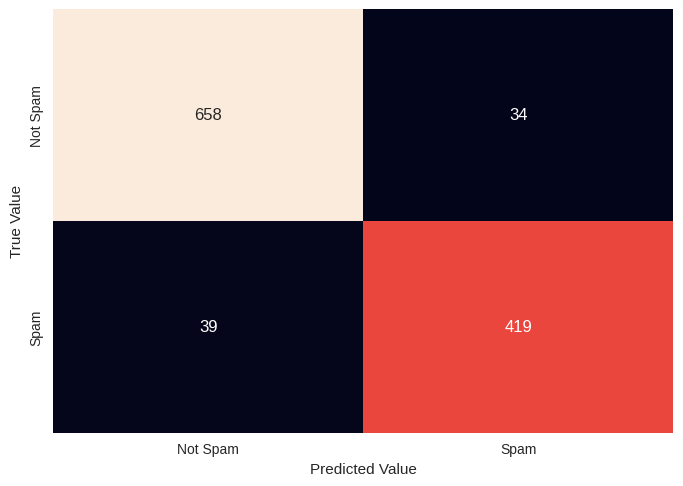

In [71]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, logreg.predict(X_test))

sns.heatmap(conf, xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'], annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
print()
# HINT: To remove scientific notation from a heatmap, set the parameter fmt='d'

In [72]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(X_test),
                            target_names=['Not Spam', 'Spam']))

              precision    recall  f1-score   support

    Not Spam       0.94      0.95      0.95       692
        Spam       0.92      0.91      0.92       458

    accuracy                           0.94      1150
   macro avg       0.93      0.93      0.93      1150
weighted avg       0.94      0.94      0.94      1150



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
1. In this case, what do a false positive and a false negative represent? Which one is worse?
1. Based on your answer to question 2, would you want to maximize precision or recall? How would you do this?

*ANSWER HERE*

1. In this question, the amount of data used is varied in two way: first of all the sample size is varied by comparing model based on the entire data set (X, y) with the model based on downsampled dataset (X_small, y_small); and secondly, the feature space is varied by comparing the model based on all features with the model based on only two features or columns. <br><br>
With regards to the first point, using a smaller data size to train the model leads to overfitting, which is demonstrated by the large difference in traning versus validation score (0.9903 vs. 0.8857) for the model based on the (X_small, y_small) dataset. This correspoends to the left-hand side of the *Learning Curve* where, the training set size is small, leading to a high-variance model. Once, the training size is sufficiently large, the Learning Cruve progresses to the right hand-side where the Validation and Training scores converge. This is the case with model based on the full dataset (X,y), which has comparable training versus validation scores (0.9287, 0.9365).<br><br>
For the second point, with the feature space diminished, there might not be enough information to make reliable predictions. This is an example of a simplistic model, or under fitting. The trainining versus validation scores for when only two columns are used are 0.6084 and 0.6130 respectively. The low scores, indicate that the model is not sophisticated enough to make accurate predictions. 

2. Since the goal of the model is to predict spam emails, the positive class is *is spam*, while the negative class is *not spam*. The false positives represent *not spam* emails which were incorrectly predicted to be *spam*. Whereas, false negatives are *spam* emails which were incorrectly predicted to be *not spam*. In this case, false positives are worse because important, *not spam* emails maybe predicted as spam, and consequently, filtered out. Whereas, a few spam emails passing through the filter is not as big of a deal. 

3. I would aim to maximize precision, as the goal of precision is to limit the number of false positives. Trade offs between precision and recall can be made by changing the threshold of the decision function. The default value of the threshold is 0, lowering the threshold would mean that more points are classifed as negatives or not spam. This would also lower the number of false positives, and hence, increase precision.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC* <br>
I wrote the code myself, I have prior experience in Pandas and Python. I did utilize Pandas and Sklearn python documentation at many points to recall or better understand functions. To learn the background on the logistic classification, I used the *Introduction to Machine Learning with Python* text book Chapter 5 and the examples provided in D2L. I completed the steps in order, however, for steps 3-5 I was a bit confused by the instructions, as I was not sure how to do the test train split given the data splits already perscribed in the instructions. I finally assumed that each of the described datasets had to be further split into test train and went with this assumption. 

## Part 2: Regression (15 marks)

For this section, we will be evaluating concrete compressive strength of different concrete samples, based on age and ingredients. You will need to repeat the steps from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [73]:
# TO DO: Import concrete dataset from yellowbrick library (0.5 marks)
from yellowbrick.datasets import load_concrete

# TO DO: Print size and type of X and y (0.5 marks)
X, y = load_concrete()

print(f"X is of type {type(X)} and size {X.shape}")
print(f"y is of type {type(y)} and size {y.shape}")

X is of type <class 'pandas.core.frame.DataFrame'> and size (1030, 8)
y is of type <class 'pandas.core.series.Series'> and size (1030,)


### Step 2: Data Processing (1 mark)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [74]:
# TO DO: Check if there are any missing values and fill them in if necessary

# No column has null-values, therefore no missing data in X
X.isnull().sum()

cement    0
slag      0
ash       0
water     0
splast    0
coarse    0
fine      0
age       0
dtype: int64

In [75]:
# No null-values, therefore no missing data in y
y.isnull().sum()

0

In [76]:
X.head()

,cement,slag,ash,water,splast,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cement  1030 non-null   float64
 1   slag    1030 non-null   float64
 2   ash     1030 non-null   float64
 3   water   1030 non-null   float64
 4   splast  1030 non-null   float64
 5   coarse  1030 non-null   float64
 6   fine    1030 non-null   float64
 7   age     1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


In [78]:
y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: strength, dtype: float64

In [79]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1030 entries, 0 to 1029
Series name: strength
Non-Null Count  Dtype  
--------------  -----  
1030 non-null   float64
dtypes: float64(1)
memory usage: 8.2 KB


### Step 3: Implement Machine Learning Model (2 marks)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LinearRegression()`
3. Implement the machine learning model with `X` and `y`

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

In [81]:
print(lr.coef_, lr.intercept_)

[ 0.12185954  0.11060501  0.0953879  -0.1419938   0.31529263  0.02485841
  0.02486899  0.11270849] -36.54109819991134


### Step 4: Validate Model (2 marks)

Calculate the training and validation accuracy using mean squared error and R2 score.

In [83]:
# TO DO: ADD YOUR CODE HERE
from sklearn.metrics import mean_squared_error as mse

print(f"The training R2 score is: {lr.score(X_train, y_train)}")
print(f"The testing R2 score is: {lr.score(X_test, y_test)}")

print(f"The training MSE score is: {mse(lr.predict(X_train), y_train)}")
print(f"The testing MSE score is: {mse(lr.predict(X_test), y_test)}")

The training R2 score is: 0.6108229424520555
The testing R2 score is: 0.6234144623633329
The training MSE score is: 111.35843861132467
The testing MSE score is: 95.90413603680643


### Step 5: Visualize Results (1 mark)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: MSE and R2 score
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [84]:
# TO DO: ADD YOUR CODE HERE
results = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy'], index=['R2', 'MSE'],
                    data=[[lr.score(X_train, y_train), lr.score(X_test, y_test)],
                          [mse(lr.predict(X_train), y_train), mse(lr.predict(X_test), y_test)]])

results

,Training Accuracy,Validation Accuracy
R2,0.610823,0.623414
MSE,111.358439,95.904136


### Questions (4 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?
1. Could we tell if this model was a good fit by using just the mean squared error? Why or why not?

*ANSWER HERE*

1. Linear Model did not produce a good result for this dataset. The training and validation Accuracies (0.6108, 0.6234) are both low indicating, an underfitting model or high-bias. Since, the two accuracies are close this means that the training size is not a limiting factor, and the model is performing on the right side of the Learning curve. To improve the performance, a more sophisticated model must be used. <br><br>
2. The Mean Squared Error (MSE) alone does not provide enough information about the model fit. I think this is because MSE is a quantity with dimensions, hence, more context regarding the physics and engineering practice surrounding the problem is required to make model judgement based off MSE. For example in analyzaing positioning algorithims or models, the MSE is valueable, as the dimensions of length e.g., meter or centimeter positioning performance is intutive to understand and appreciate. However, when removed from the domain, the dimensionless performance indicator such as R2 is more valuable. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

As with the previous part, I wrote the code myself. I utilized Pandas and Sklearn documentation for some clarification, and utilized the *Introduction to Machine Learning with Python* textbook along with the course notes and examples for understanding linear regression better. I completed the steps in the order perscribed, and did not have challenges with this question.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

One interesting pattern is that even though validation score should generally be lower than training score, sometimes this is not the case. For example, in Part 1, for the full dataset based and two column based classification, the validation scores are higher (0.9365 and 0.61305 compared to 0.9287 and 0.6084). Same for Part 2, with validation score of 0.6234 compared to training score of 0.6108. 

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I liked that the questions utlized real datasets, and although the processes of applying ML is repetitive, the use of a new dataset for a new challenge, made it challenging and kept it exciting. <br><br>
I think assignments with less instructions and more of a project like structure would be even more enjoyable, as we will have to problem solve and research extensively. <br><br>
The only confusing part was the wording the the Part A, about training the three different logistic regression models. 